<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install pyxirr

In [19]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-04-11 18:56:34
-------------------
qualified stocks: 90
with latest results: 84
still star stocks: 46
-------------------
Initial Investment:  1.09 C
CY Investment:  1.36 C
Reserve:  2.13 L
Current:  1.12 C
-------------------
Today PnL: 1.69 L (1.53%)
Current PnL: -23.97 L (-17.62%)
CY Booked + Current PnL: -23.68 L (-17.41%)
-------------------
Total profit:  2.87 L
Total loss:  -26.84 L
-------------------
Total Booked + Current PnL: 3.30 L (3.02%)
Total Booked PnL: 27.27 L (25.01%)
Curr Year Booked PnL: 28.87 K (0.26%)
Prev Year Booked PnL: 26.98 L (24.74%)
Est FTT:  1.93 C
Est FTT PnL: 80.91 L (71.97%)
-------------------
Est LTT:  2.54 C
Est LTT PnL: 1.41 C (125.53%)
Deployed:  1.09 C
Current:  1.12 C
CAGR/XIRR %: 2.2%
Row successfully appended and saved to data/myPortfolioDB.csv.


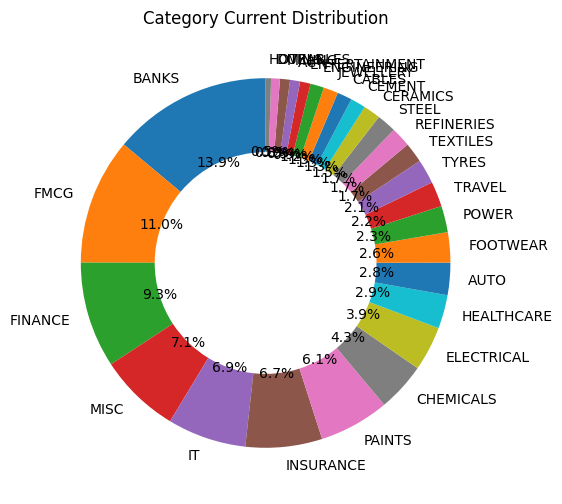

In [20]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [21]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
70,SBIN,760.30,863.00,-23.22,M-LC,44.44,199770.0,-1710.0,28927.0,1.57,...,14.48,13.51,93.0,-0.06,1.81,9.44,XY25,NTT,LC,BANKS
54,NMDC,65.62,82.00,28.21,M-MC,30.00,96252.0,-4147.0,29203.0,2.61,...,30.34,24.96,507.0,-0.14,0.87,8.48,XY25,NTT,MC,MINING
35,HINDUNILVR,2430.78,2723.00,-17.17,X-LC,65.56,198757.0,-5429.0,29973.0,0.69,...,15.08,12.02,-3.0,-0.18,1.80,9.72,XY25,NTT,LC,FMCG
11,AXISBANK,1003.18,1317.30,-22.52,H-LC,48.89,130412.0,8024.0,30295.0,0.69,...,23.23,31.31,NaN,0.26,1.18,12.75,X40,ATH,LC,BANKS
50,MEDANTA,1022.60,1486.00,10.65,X-MC,78.89,193032.0,37597.0,32835.0,3.40,...,17.01,45.32,8.0,1.15,1.75,31.34,XY24,NTT,MC,HEALTHCARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,SAIL,130.64,228.00,63.92,M-MC,31.11,186561.0,-38401.0,206057.0,3.21,...,110.45,74.53,-18.0,-0.19,1.69,8.32,XY24,BTT,MC,STEEL
62,REPCOHOME,515.07,880.00,-24.22,H-SC,90.00,141031.0,-63967.0,209205.0,1.56,...,148.34,70.85,-44.0,-0.31,1.28,13.85,XY24,NTT,SC,FINANCE
59,RBLBANK,230.61,388.00,-17.89,M-SC,87.78,176276.0,-58024.0,217930.0,2.86,...,123.63,68.25,-48.0,-0.27,1.60,16.08,XY24,NTT,SC,BANKS
12,BANDHANBNK,214.25,400.00,-35.97,H-SC,67.78,173629.0,-74901.0,290377.0,1.92,...,167.24,86.70,-29.0,-0.26,1.57,14.86,XY24,NTT,SC,BANKS


In [22]:
# Xceptional allocation
tmp_df = df_portfolio_features[df_portfolio_features['Conviction'].str.startswith('X-', na=False)]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
35,HINDUNILVR,2430.78,2723.00,-17.17,X-LC,65.56,198757.0,-5429.0,29973.0,0.69,...,15.08,12.02,-3.0,-0.18,1.80,9.72,XY25,NTT,LC,FMCG
50,MEDANTA,1022.60,1486.00,10.65,X-MC,78.89,193032.0,37597.0,32835.0,3.40,...,17.01,45.32,8.0,1.15,1.75,31.34,XY24,NTT,MC,HEALTHCARE
52,NESTLEIND,2225.87,2755.00,-14.55,X-LC,52.22,214887.0,12333.0,35822.0,0.71,...,16.67,23.77,NaN,0.34,1.95,10.54,XY25,NTT,LC,FMCG
55,PIDILITIND,2482.94,3576.00,-15.13,X-LC,81.11,171251.0,27240.0,36151.0,0.44,...,21.11,44.02,10.0,0.75,1.55,11.09,X40,BTT,LC,CHEMICALS
16,BRITANNIA,4905.19,6446.05,8.49,X-LC,92.22,214008.0,17800.0,43829.0,0.20,...,20.48,31.41,239.0,0.41,1.94,16.94,AR,ATH,LC,FMCG
25,DMART,3499.95,5112.00,-19.86,X-LC,95.56,194180.0,29682.0,46079.0,-0.19,...,23.73,46.06,33.0,0.64,1.76,21.37,AR,NTT,LC,FMCG
33,HDFCBANK,1541.80,2170.00,-1.79,X-LC,71.11,231264.0,33914.0,46507.0,2.37,...,20.11,40.74,4.0,0.73,2.10,26.52,X40,BTT,LC,BANKS
32,HAVELLS,1571.40,2077.12,-2.71,X-LC,50.00,131825.0,-3315.0,46811.0,4.30,...,35.51,32.18,NaN,-0.07,1.20,8.94,X40,ATH,LC,ELECTRICAL
61,RELIANCE,1288.53,1526.00,-9.92,X-LC,25.56,192594.0,-10994.0,48514.0,2.83,...,25.19,18.43,67.0,-0.23,1.75,4.91,XY25,NTT,LC,REFINERIES
20,CERA,9059.90,10420.45,-29.12,X-SC,38.89,53935.0,-36664.0,50267.0,-0.36,...,93.20,15.02,-57.0,-0.73,0.49,6.12,X40N,ATH,SC,CERAMICS


In [23]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
70,SBIN,760.30,863.0,-23.22,M-LC,44.44,199770.0,-1710.0,28927.0,1.57,...,14.48,13.51,93.0,-0.06,1.81,9.44,XY25,NTT,LC,BANKS
54,NMDC,65.62,82.0,28.21,M-MC,30.00,96252.0,-4147.0,29203.0,2.61,...,30.34,24.96,507.0,-0.14,0.87,8.48,XY25,NTT,MC,MINING
35,HINDUNILVR,2430.78,2723.0,-17.17,X-LC,65.56,198757.0,-5429.0,29973.0,0.69,...,15.08,12.02,-3.0,-0.18,1.80,9.72,XY25,NTT,LC,FMCG
50,MEDANTA,1022.60,1486.0,10.65,X-MC,78.89,193032.0,37597.0,32835.0,3.40,...,17.01,45.32,8.0,1.15,1.75,31.34,XY24,NTT,MC,HEALTHCARE
46,LICI,761.77,983.0,-24.11,H-LC,40.00,126452.0,1522.0,34762.0,0.44,...,27.49,29.04,202.0,0.04,1.15,5.74,XY25,NTT,LC,INSURANCE
52,NESTLEIND,2225.87,2755.0,-14.55,X-LC,52.22,214887.0,12333.0,35822.0,0.71,...,16.67,23.77,NaN,0.34,1.95,10.54,XY25,NTT,LC,FMCG
15,BERGEPAINT,558.54,680.0,-23.35,H-MC,64.44,168168.0,-8889.0,47390.0,-1.32,...,28.18,21.75,-14.0,-0.19,1.52,20.29,XY24,NTT,MC,PAINTS
61,RELIANCE,1288.53,1526.0,-9.92,X-LC,25.56,192594.0,-10994.0,48514.0,2.83,...,25.19,18.43,67.0,-0.23,1.75,4.91,XY25,NTT,LC,REFINERIES
86,UNIONBANK,123.87,163.0,-16.54,M-LC,41.11,133973.0,-6867.0,51352.0,0.93,...,38.33,31.59,-39.0,-0.13,1.21,16.38,XY24,NTT,LC,BANKS
67,SBICARD,765.91,1075.0,-9.13,H-MC,37.78,200220.0,20231.0,52398.0,0.64,...,26.17,40.36,-1.0,0.39,1.82,28.73,XY24,NTT,MC,FINANCE


In [24]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
69,SBILIFE,1496.49,1924.99,-13.82,H-LC,73.33,127840.0,2135.0,33865.0,2.72,...,26.49,28.63,NaN,0.06,1.16,13.89,AR,ATH,LC,INSURANCE
49,MASFIN,326.60,399.50,-30.21,H-SC,77.78,77940.0,-20040.0,41908.0,1.48,...,53.77,22.32,-74.0,-0.48,0.71,13.04,XR,ATH,SC,FINANCE
19,CAMS,3643.00,5250.99,-6.40,H-SC,86.67,104068.0,2064.0,42959.0,3.52,...,41.28,44.14,261.0,0.05,0.94,24.44,XR,ATH,SC,MISC
16,BRITANNIA,4905.19,6446.05,8.49,X-LC,92.22,214008.0,17800.0,43829.0,0.20,...,20.48,31.41,239.0,0.41,1.94,16.94,AR,ATH,LC,FMCG
25,DMART,3499.95,5112.00,-19.86,X-LC,95.56,194180.0,29682.0,46079.0,-0.19,...,23.73,46.06,33.0,0.64,1.76,21.37,AR,NTT,LC,FMCG
83,TRIDENT,37.35,48.00,38.38,M-SC,53.33,64418.0,-27836.0,54143.0,2.56,...,84.05,28.51,-16.0,-0.51,0.58,8.58,XR,NTT,SC,TEXTILES
38,INDUSINDBK,1354.50,1800.00,-47.11,H-MC,54.44,39302.0,-37904.0,63300.0,1.62,...,161.06,32.89,-21.0,-0.60,0.36,8.23,XR,NTT,MC,BANKS
51,MRF,113820.50,150504.12,2.90,X-MC,85.56,235089.0,7448.0,65919.0,3.92,...,28.04,32.23,NaN,0.11,2.13,14.50,AR,ATH,MC,TYRES
45,LAOPALA,369.40,464.00,-30.19,H-SC,47.78,58780.0,-42066.0,67891.0,0.81,...,115.50,25.61,-50.0,-0.62,0.53,6.01,AR,NTT,SC,CERAMICS
24,DEN,52.79,75.00,-40.87,L-SC,23.33,49232.0,-35232.0,70766.0,2.06,...,143.74,42.07,-21.0,-0.50,0.45,4.55,AR,NTT,SC,ENTERTAINMENT


In [25]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.12
1,20,35.29
2,30,48.69


In [26]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,40.69
X40,13.67
X40N,12.82
AR,11.94
XY25,9.33
XR,9.12
SR,1.26
X200,1.15


In [27]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-LC,20.96
H-SC,18.88
M-SC,18.07
M-MC,7.78
H-LC,7.58
M-LC,6.69
H-MC,6.54
X-MC,6.54
X-SC,2.77


In [28]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          9.61
          H-SC          8.95
X40       X-LC          8.80
XY24      H-MC          6.18
XY25      X-LC          5.50
XY24      M-MC          5.36
X40N      H-SC          5.11
XY24      M-LC          4.88
AR        X-LC          4.32
X40N      M-SC          3.63
XR        H-SC          3.32
X40       H-LC          2.81
XR        M-SC          2.79
AR        H-LC          2.33
          X-MC          2.13
XY25      M-LC          1.81
XY24      X-MC          1.75
X40N      X-MC          1.53
AR        H-SC          1.50
X40N      H-LC          1.29
          X-SC          1.26
XY24      X-LC          1.19
XY25      H-LC          1.15
X200      X-LC          1.15
X40       X-MC          1.13
XY24      L-SC          1.00
XR        L-SC          0.95
X40       M-SC          0.93
XY25      M-MC          0.87
XR        M-MC          0.87
          X-SC          0.83
AR        M-MC          0.68
SR        X-SC          0.68
          M-SC          0.58
AR        M-SC          0.53
          L-SC          0.45
XR        H-MC          0.36
Name: CurrAlloc%, dtype: float64

In [29]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,13.91,-14.40,67.84
FMCG,11.04,-1.91,33.57
FINANCE,9.27,-25.92,81.90
MISC,7.13,-31.17,78.62
IT,6.87,-46.54,119.57
INSURANCE,6.70,-0.77,47.47
PAINTS,6.15,-21.38,57.30
CHEMICALS,4.27,-14.68,90.25
ELECTRICAL,3.92,-25.55,80.81


In [30]:
# bucketX stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,78.28,8632033.0,-14.33,-1237332.0,60.54,5225539.0


In [31]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3370343.0
X40N,1262260.0
XR,1230541.0
AR,1086900.0
X40,637238.0
XY25,207201.0
SR,205636.0
X200,90647.0


In [32]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2281912.0
M-SC,2103643.0
X-LC,918542.0
M-MC,684208.0
X-SC,372110.0
H-MC,353627.0
L-SC,333946.0
H-LC,319697.0
M-LC,317779.0


In [33]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1005732.0
          M-SC           996770.0
X40N      H-SC           568071.0
XY24      M-MC           481543.0
XR        M-SC           477548.0
X40       X-LC           414627.0
AR        H-SC           400203.0
X40N      M-SC           376568.0
XR        H-SC           307906.0
XY24      H-MC           290327.0
          M-LC           288852.0
AR        X-LC           220958.0
XR        L-SC           174646.0
          X-SC           134463.0
X40N      X-MC           132982.0
AR        H-LC           130482.0
SR        X-SC           121561.0
X40N      X-SC           116086.0
XY25      X-LC           114309.0
AR        M-MC           100784.0
          M-SC            97788.0
X200      X-LC            90647.0
XY24      L-SC            88534.0
X40       H-LC            85900.0
SR        M-SC            84075.0
XY24      X-LC            78001.0
XR        M-MC            72678.0
X40       M-SC            70894.0
AR        L-SC            70766.0
X40N      H-LC            68553.0
AR        X-MC            65919.0
X40       X-MC            65817.0
XR        H-MC            63300.0
XY25      H-LC            34762.0
XY24      X-MC            32835.0
XY25      M-MC            29203.0
          M-LC            28927.0
Name: FTT Amt, dtype: float64

In [34]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,21
H-SC,18
X-LC,14
M-MC,7
H-LC,6
M-LC,5
X-MC,5
H-MC,5
X-SC,4
